## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [36]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [37]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        804 non-null    float64
 1   Mileage      804 non-null    int64  
 2   Cylinder     804 non-null    int64  
 3   Doors        804 non-null    int64  
 4   Cruise       804 non-null    int64  
 5   Sound        804 non-null    int64  
 6   Leather      804 non-null    int64  
 7   Buick        804 non-null    int64  
 8   Cadillac     804 non-null    int64  
 9   Chevy        804 non-null    int64  
 10  Pontiac      804 non-null    int64  
 11  Saab         804 non-null    int64  
 12  Saturn       804 non-null    int64  
 13  convertible  804 non-null    int64  
 14  coupe        804 non-null    int64  
 15  hatchback    804 non-null    int64  
 16  sedan        804 non-null    int64  
 17  wagon        804 non-null    int64  
dtypes: float64(1), int64(17)
memory usage: 113.2 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [38]:
# Put the command (or commands) here to answer the questions above.
print("Min price", cars['Price'].min())
print("Max price", cars['Price'].max())
print("Min mileage", cars['Mileage'].min())
print("Max mileage", cars['Mileage'].max())
print("Average mileage", cars['Mileage'].mean())
print(cars.shape)
print("804 rows, 18 columns")
print("Null values: ", cars.isnull().values.any())

Min price 8638.93
Max price 70755.47
Min mileage 266
Max mileage 50387
Average mileage 19831.93407960199
(804, 18)
804 rows, 18 columns
Null values:  False


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\python3.7\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\python3.7\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.Rendere

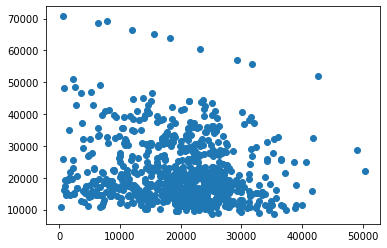

In [39]:
# Put the command (or commands) here that would give answer to the above question.
# from pylab import *
# scatter(cars['Mileage'], cars['Price'])
import matplotlib.pyplot as plt
plt.scatter(cars['Mileage'], cars['Price'])
print("Yes")

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [60]:
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model

# Linear regression model:
regr = linear_model.LinearRegression()
x = np.array(cars['Mileage']).reshape((-1, 1))
regr.fit(x, cars['Price'])
y_pred = regr.predict(x)

# Show summary statistics for the model:
X = cars['Mileage']
X = sm.add_constant(X)
y = cars['Price']

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           4.68e-05
Time:                        18:26:15   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.0

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [41]:
# Command:

# One sentence summary:
# 

<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [42]:
# Single command


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

In [43]:
# Plot residuals

# Explain whether there are any problems (1-2 sentence)
#

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [44]:
# Commands:

# Explanation:
# 

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [45]:
# Command(s):

# Comment on the result


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [46]:
chevy = c("Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound"=1, "Leather"=1)
# Commands that estimate the price of 'chevy' using the model with 6 predictors


SyntaxError: keyword can't be an expression (<ipython-input-46-d42020535735>, line 1)

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [ ]:
# Commands

# Comments on problems
#

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter your response here